In [208]:
import pandas as pd
from plotnine import *

## Working with Data of Global Indicators - Gapminder

"Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions."


## Task 1

Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.


<img src = "gapminder_pic.png"
        width = "800"
        height = "300">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    For the year 2010:

    - Income is being mapped to X.
    - Life expectancy is being mapped to Y.
    - Population is being mapped to size. 
    - World Region is being mapped to fill/color.
    
    It also appears they are segmenting the scatter plot into 4 income levels. Additionally, it appears they are noting income is per person (GDP/capita, PPPS inflation-adjusted). 

2. Import the q1data.csv dataset.

In [209]:
q1data = pd.read_csv('Data/q1data.csv')
q1data.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

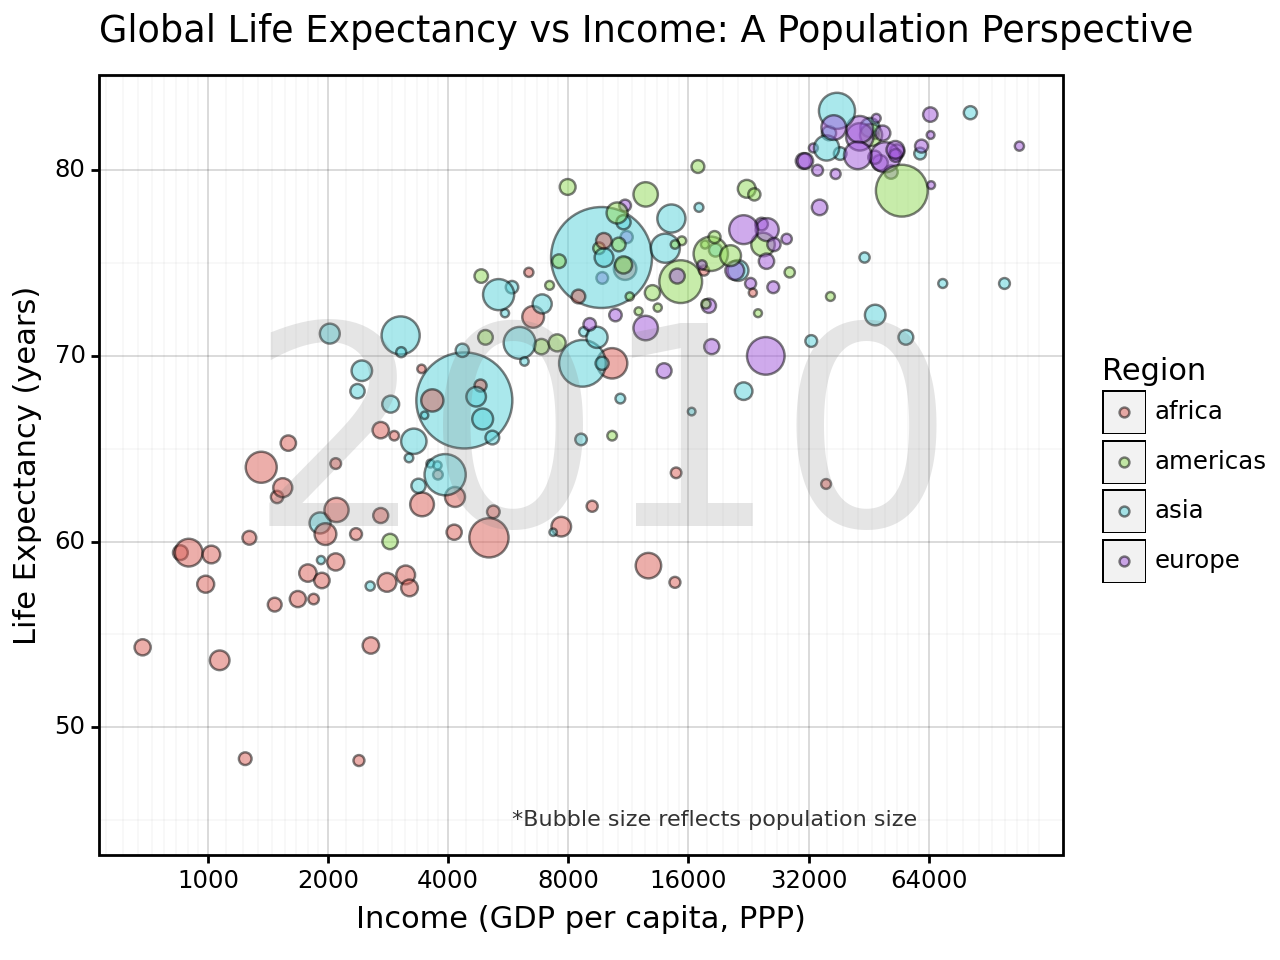

<Figure Size: (640 x 480)>

In [210]:
# Create the plot with a log10 scale for the x-axis to make it similar to Gapminder Scale
# Sources Used:
# https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine
# https://plotnine.org/reference/scale_x_log10.html
# https://plotnine.org/reference/guide.html
# https://f0nzie.github.io/rmarkdown-python-plotnine/scales-and-zooming.html
# https://plotnine.org/reference/scale_size_continuous.html
(ggplot(q1data.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions')) +
    geom_point(alpha = 0.5) +
    scale_size_continuous(range=[1, 20], guide = False) + # Change bubble size to look like Gapminder Plot
    theme_linedraw() + 
    labs(x='Income (GDP per capita, PPP)', y='Life Expectancy (years)', 
         fill='Region',
         title = "Global Life Expectancy vs Income: A Population Perspective") +  
    scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) + # See top comment
    annotate("text", x=9700, y=65, label="2010", 
             size=100, color="grey", alpha=0.2, ha='center') + # Add year like Gapminder plot
    annotate("text", x=60000, y=45, label="*Bubble size reflects population size", 
             size=8, color="black", alpha=0.8, ha='right') + # Add bubble size descriptor in lieu of population toggle 
    theme(legend_position='right'))

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

    - To capture all variables in the original plot, we can use the income levels seen in the Gapminder plot from the image above. Focusing on the log-scaled income axis the bins are divided into four distinct levels, based on log-scaled income groupings.

    - Here’s how we will match these bins:

        - Level 1: Low-income countries, roughly from 0 to 2k
    
        - Level 2: Lower-middle-income countries, roughly from 2k to 8k
            
        - Level 3: Upper-middle-income countries, roughly from 8k to 32k
            
        - Level 4: High-income countries, 32k and above

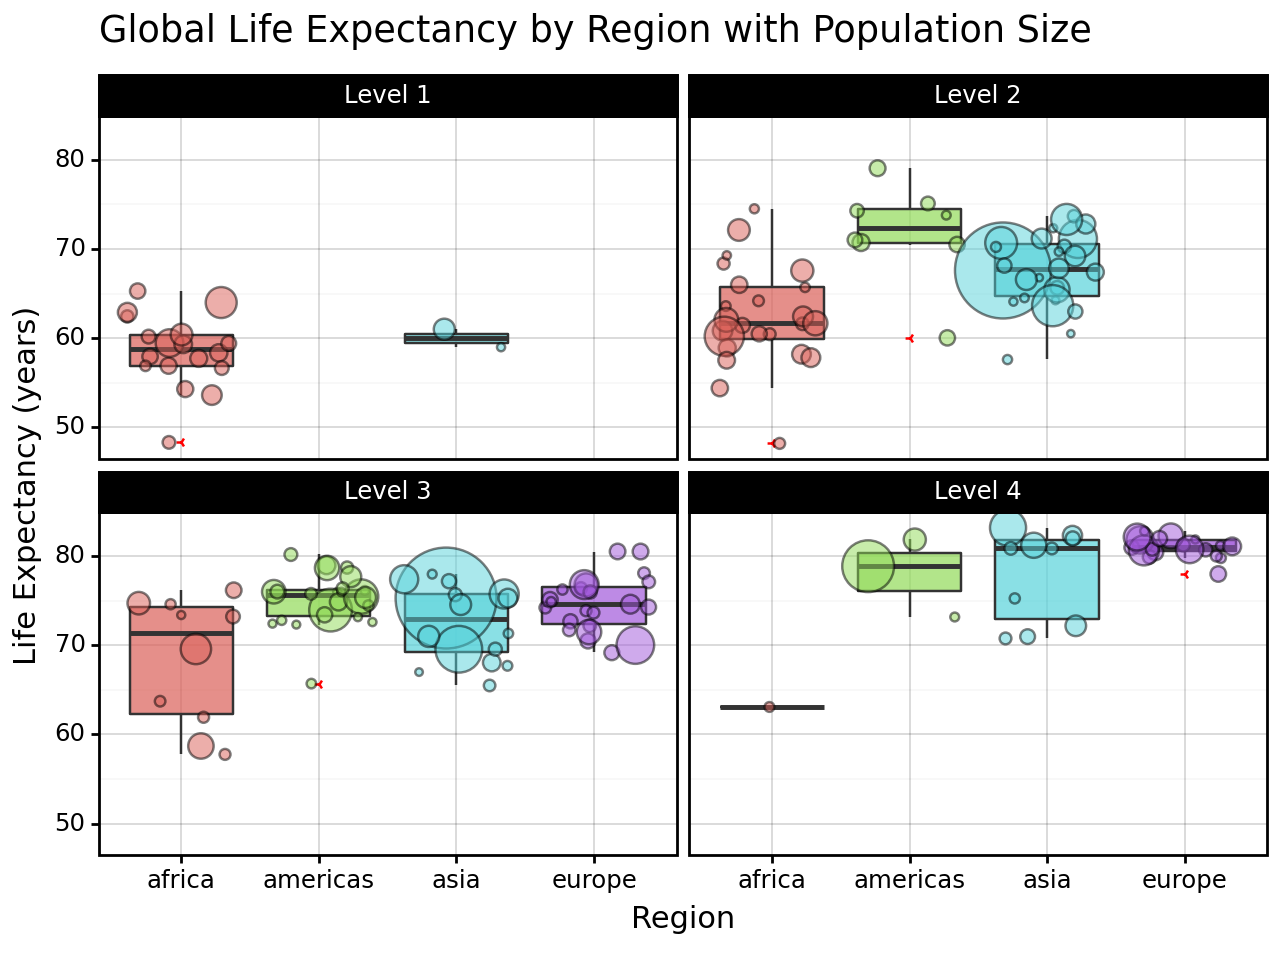

<Figure Size: (640 x 480)>

In [211]:
# Define income bins based on your Gapminder image
q1data['income_group'] = pd.cut(q1data['income'], 
                                bins=[0, 2000, 8000, 32000, 64000], 
                                labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'])

# Create the faceted boxplot based on these income bins
(ggplot(q1data.dropna(), aes(x='four_regions', y='life_exp', fill='four_regions')) + 
    geom_boxplot(alpha=0.7, outlier_color="red", outlier_shape="3") + 
    geom_jitter(aes(size='population'), color="black", alpha=0.5) + 
    scale_size_continuous(range=[1, 20], guide=False) + 
    theme_linedraw() + 
    labs(x='Region', y='Life Expectancy (years)', 
         title="Global Life Expectancy by Region with Population Size") + 
    facet_wrap('~income_group') + # Create side-by-side boxplots for each income level
    theme(legend_position='none'))

This approach is beneficial for visualizing the data because it combines two types of insights: the
boxplot shows the distribution of life expectancy within each region (medians, quartiles, and outliers)
while the overlaid points represent individual countries, with the size of the points indicating
population. These boxplots are good for showing the distribution of life expectancy by region, but they don't utilize the continuous income variable effectively. We incorporated income by binning income into categories, which allowed us to use these boxplots to show life expectancy across regions while indirectly including income levels.  However, binning income into levels hides the more detailed relationships between income and life expectancy, and overlapping points can make it hard to see individual countries, especially those with smaller populations, like Africa in income level 4. The chart includes a lot of information, which could be overwhelming for someone unfamiliar with the data, and grouping income into broad categories means we lose the finer details of how income affects life expectancy within each level. Additionally, using geom_jitter instead of geom_point helps to spread out the data points, reducing overlap and making it easier to distinguish individual countries. This is particularly useful when visualizing population size, as it allows smaller countries to be seen more clearly. However, geom_jitter introduces slight randomness in the placement of points, which can make it harder to interpret the exact relationship between variables compared to the more precise placement of geom_point. 

## Task 2

Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.


<img src = "task2_pic.png"
        width = "800"
        height = "300">

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

    For the year 1997:

    - Exports(% of GDP) is being mapped to X.
    - Imports(% of GDP) is being mapped to Y.
    - Energy Use is being mapped to size. 
    - World Region is being mapped to fill/color.

2. Import the q2data.csv dataset.
        -  Below is the import of the q2data set. We saw that the column energy was not entirely tidy, especially for our mapped aesthetics. So, we tidied the column by removing value indicators like 'k', and multiplied those values by 1000. 

In [212]:
q2data = pd.read_csv('Data/q2data.csv')
q2data = q2data.dropna()

# Define a function to convert values like '12.4k' to 12400
def convert_k_to_numeric(value):
    if isinstance(value, str) and 'k' in value:
        # Remove the 'k' and multiply the number by 1000
        return float(value.replace('k', '')) * 1000
    return value  # Return the value as is if it doesn't need conversion

# Apply the function to the 'energy' column
q2data['energy'] = q2data['energy'].apply(convert_k_to_numeric).astype(int)

# Display the updated column
q2data.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
6,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
7,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
9,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific


3. Recreate the plot as best you can using plotnine.


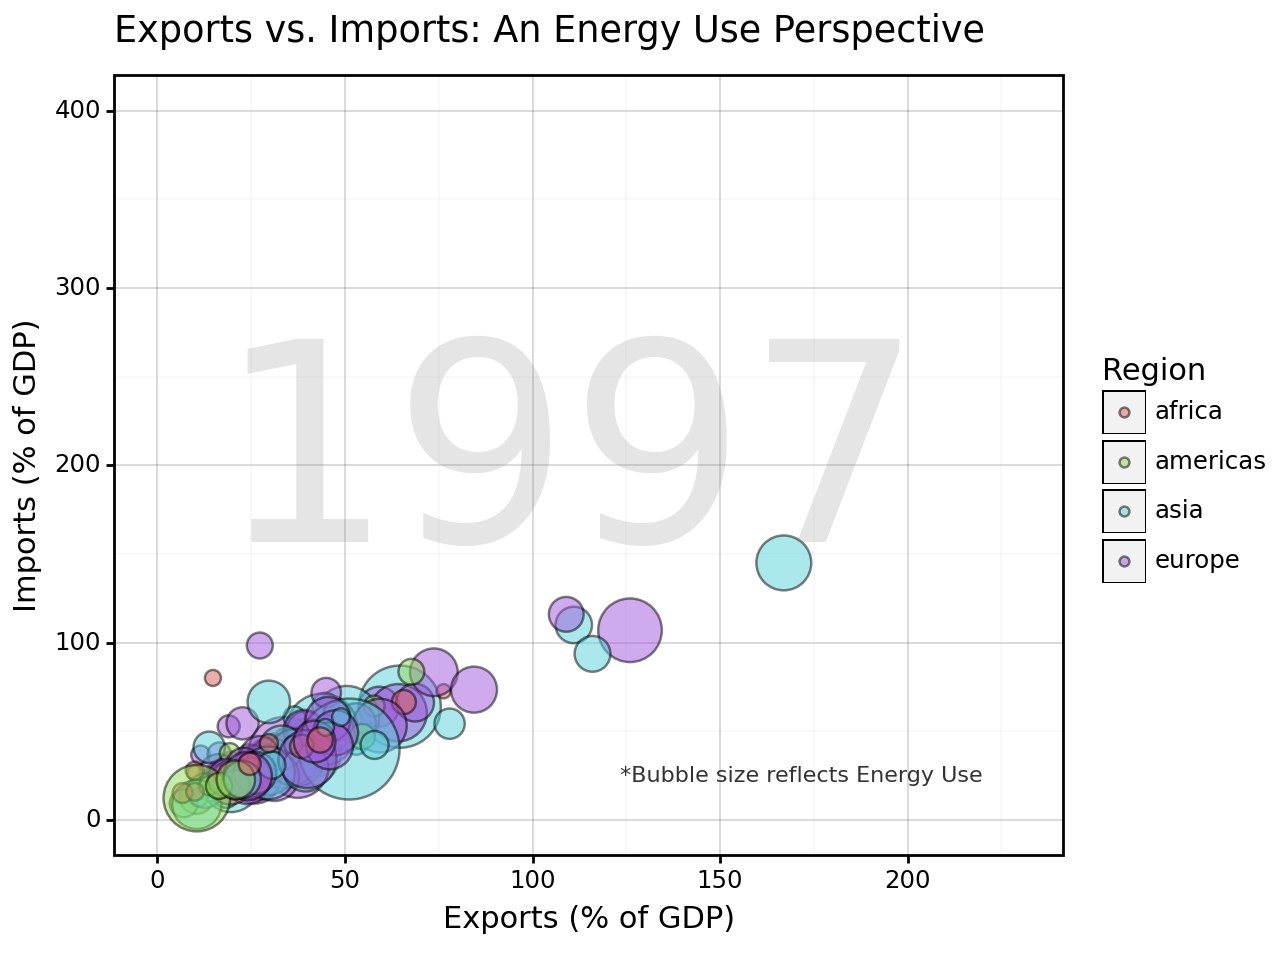

<Figure Size: (640 x 480)>

In [213]:
(ggplot(q2data, aes(x='exports', y='imports', size='energy', fill='four_regions')) +
    geom_point(alpha = 0.5) +
    scale_size_continuous(range=[1, 20], guide = False)  + # Change bubble size to look like Gapminder Plot
    theme_linedraw() + 
    labs(x='Exports (% of GDP)', y='Imports (% of GDP)', 
         fill='Region',
         title = "Exports vs. Imports: An Energy Use Perspective") +
    ylim(0, 400) + # Match Y axis to the Gapminder Plot
    xlim(0, 230) + # Match X axis to the Gapminder Plot
    annotate("text", x=110, y=200, label="1997", 
             size=100, color="grey", alpha=0.2, ha='center') + # Add year like Gapminder plot
    annotate("text", x=220, y=25, label="*Bubble size reflects Energy Use", 
             size=8, color="black", alpha=0.8, ha='right') + # Add bubble size descriptor in lieu of energy toggle 
    theme(legend_position='right'))

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

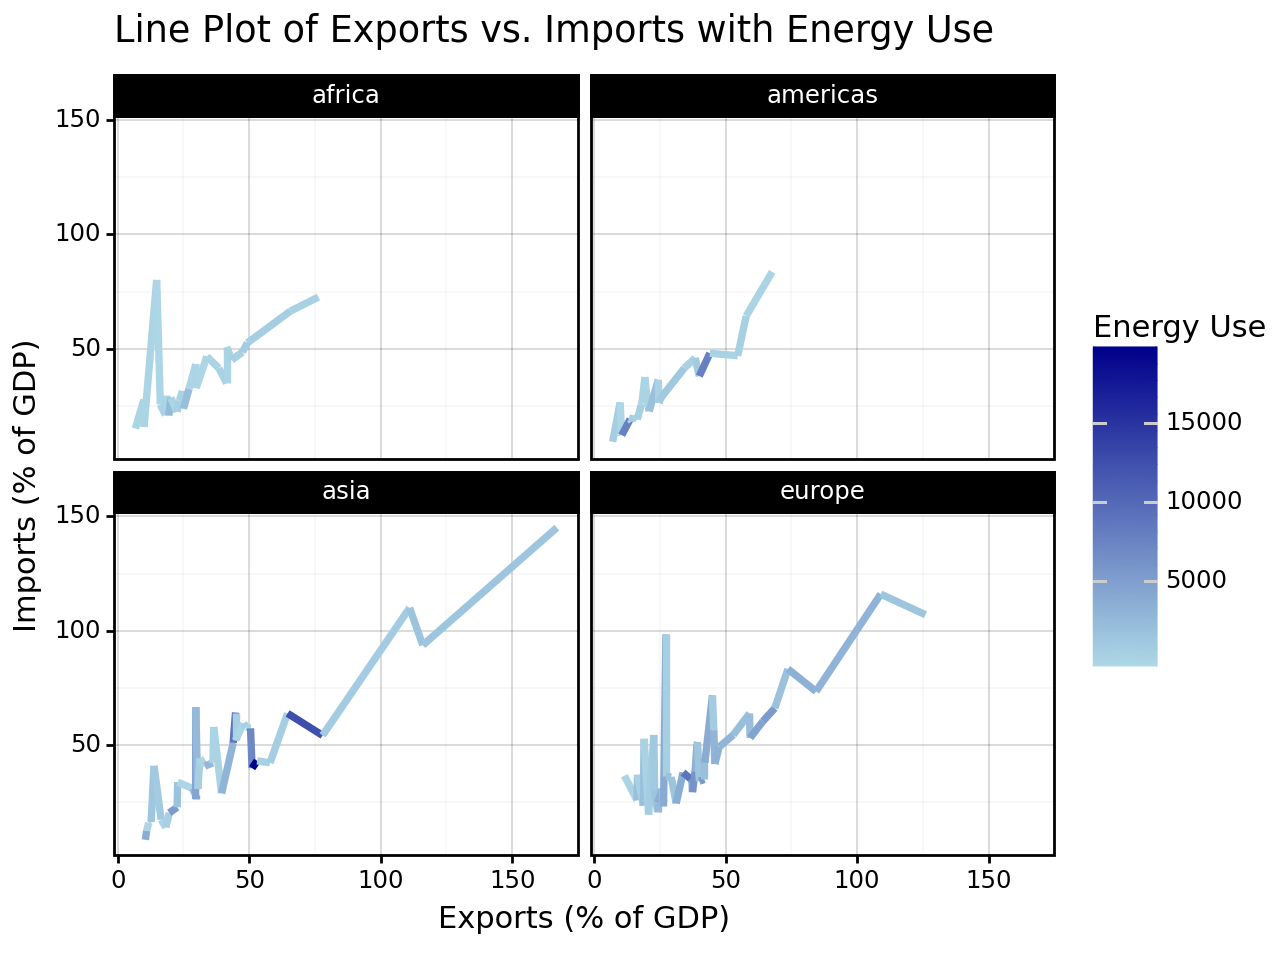

In [214]:
from plotnine import facet_wrap

line_plot_facet = (
    ggplot(q2data, aes(x='exports', y='imports', color='energy', group='four_regions')) +
    geom_line(size=1.5) +  # Line plot with lines grouped by region
    scale_color_gradient(low="lightblue", high="darkblue", name="Energy Use") +  # Color gradient for energy use
    labs(
        title="Line Plot of Exports vs. Imports with Energy Use",
        x="Exports (% of GDP)",
        y="Imports (% of GDP)"
    ) +
    facet_wrap('~four_regions') +  # Facet by region to get individual plots for each region
    theme_linedraw() +
    theme(legend_position='right')
)

print(line_plot_facet)


The plot effectively shows trends in the relationship between exports and imports across different regions, with energy use represented by a color gradient. The facet wrapping by region allows for clear comparisons, but some regions, like the Americas, have limited data points, making trends harder to discern. The color scale for energy use is visually appealing but may be difficult to interpret precisely in regions with overlapping lines, such as Africa. Additionally, some jagged or discontinuous lines in regions like Europe and Asia suggest either missing data or abrupt changes, which can be confusing. Overall, the plot provides valuable insights, like high energy use in Asia and the Americas at moderate exports/imports, but could be improved with smoothing and adjustments to the representation of energy use.